In [1]:
import tensorflow 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense,GlobalAveragePooling2D, BatchNormalization
import os, shutil
import cv2

In [4]:
original_dataset_dir=r'C:\Users\Dell\Desktop\data\ML-notebooks-main\dataset\kagglecatsanddogs_3367a\PetImages'

In [5]:
base_train=r'C:\Users\Dell\Desktop\data\ML-notebooks-main\dataset\kagglecatsanddogs_3367a\catVsdog'
os.mkdir(base_train)

In [6]:
train_dir=os.path.join(base_train,'train')
os.mkdir(train_dir)
validation_dir= os.path.join(base_train,'validation')
os.mkdir(validation_dir)
test_dir=os.path.join(base_train, 'test')
os.mkdir(test_dir)

In [7]:
train_cats_dir= os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir= os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir= os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir= os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir= os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir= os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [8]:
#['{}'.format(i) for i in range(1000)]

In [9]:
for i in range(1000):
    fname = f"{i}.jpg"
    src = os.path.join(original_dataset_dir, "Cat", fname)
    dst = os.path.join(train_cats_dir, fname)

    if os.path.exists(src):
        shutil.copyfile(src, dst)
    else:
        print(f"Missing: {src}")

Missing: C:\Users\Dell\Desktop\data\ML-notebooks-main\dataset\kagglecatsanddogs_3367a\PetImages\Cat\666.jpg
Missing: C:\Users\Dell\Desktop\data\ML-notebooks-main\dataset\kagglecatsanddogs_3367a\PetImages\Cat\835.jpg


In [10]:
for i in range(1000,1500):
    fname= f'{i}.jpg'
    src= os.path.join(original_dataset_dir, 'Cat', fname)
    dst= os.path.join(validation_cats_dir, fname)
    if os.path.exists(src):
        shutil.copyfile(src,dst)
    else:
        print(f'Missing:{src}')
    

In [11]:
for i in range(1500,2000):
    fname=f'{i}.jpg'
    src= os.path.join(original_dataset_dir,'Cat', fname)
    dst= os.path.join(test_cats_dir, fname)
    if os.path.exists(src):
        shutil.copyfile(src,dst)
    else:
        print(f'Missing:{src}')

In [12]:
for i in range(1000):
    fname= f'{i}.jpg'
    src= os.path.join(original_dataset_dir, 'Dog', fname)
    dst= os.path.join(train_dogs_dir,fname)
    if os.path.exists(src):
        shutil.copy(src,dst)
    else:
        print(f'Missing:{src}')

Missing:C:\Users\Dell\Desktop\data\ML-notebooks-main\dataset\kagglecatsanddogs_3367a\PetImages\Dog\495.jpg


In [13]:
for i in range(1000,1500):
    fname=f'{i}.jpg'
    src= os.path.join(original_dataset_dir,'Dog', fname )
    dst= os.path.join(validation_dogs_dir,fname)
    if os.path.exists(src):
        shutil.copy(src,dst)
    else:
        print(f'Missing:{src}')

Missing:C:\Users\Dell\Desktop\data\ML-notebooks-main\dataset\kagglecatsanddogs_3367a\PetImages\Dog\1043.jpg
Missing:C:\Users\Dell\Desktop\data\ML-notebooks-main\dataset\kagglecatsanddogs_3367a\PetImages\Dog\1174.jpg
Missing:C:\Users\Dell\Desktop\data\ML-notebooks-main\dataset\kagglecatsanddogs_3367a\PetImages\Dog\1259.jpg


In [14]:
for i in range(1500,2000):
    fname=f'{i}.jpg'
    src= os.path.join(original_dataset_dir, 'Dog', fname)
    dst= os.path.join(test_dogs_dir, fname)
    if os.path.exists(src):
        shutil.copy(src,dst)
    else:
        print(f'Missing:{src}')

In [133]:
import keras.utils as image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir) if fname.lower().endswith(('.jpg', '.jpeg', '.png'))]

image_path= fnames[111]
img= image.load_img(image_path, target_size=(500,500))
x= image.img_to_array(img)
x= np.expand_dims(x, axis=0)
img_aug= ImageDataGenerator(rotation_range=60, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, shear_range=0.2)
image_pic= img_aug.flow(x)                     
                        

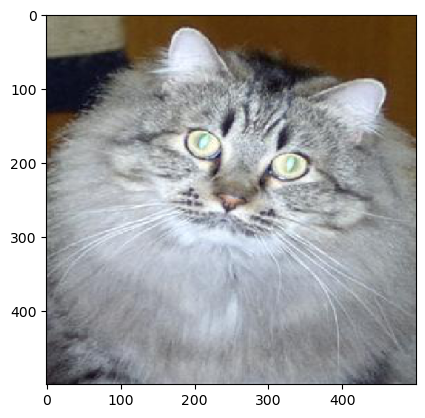

In [134]:
plt.imshow(img)

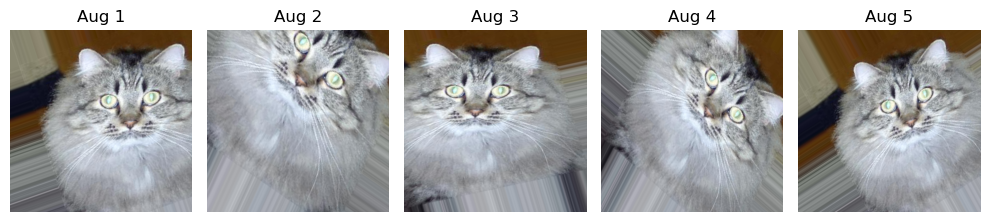

In [136]:
num_aug=5
plt.figure(figsize=(10, 10))  
for i in range(num_aug):
    aug_image = next(image_pic)[0].astype('uint8')
    plt.subplot(1, 5, i + 1) 
    plt.imshow(aug_image)
    plt.axis('off')
    plt.title(f'Aug {i+1}')
plt.tight_layout()
plt.show()   

In [66]:
def create_model():
    model= Sequential()
    model.add(Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(128,(3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))
    return model     

In [67]:
model= create_model()

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 74, 74, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 35, 35, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 35, 35, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,233 (184.50 KB)

 Trainable params: 46,721 (182.50 KB)

 Non-trainable params: 512 (2.00 KB)

In [198]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, shear_range=0.2, horizontal_flip=True)
test_datagen= ImageDataGenerator(rescale=1./255)
train_generator= train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')
validation_generator= test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 1997 images belonging to 2 classes.
Found 997 images belonging to 2 classes.


In [199]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(train_generator, validation_data=validation_generator, epochs=100)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 60s 572ms/step - accuracy: 0.5100 - loss: 1.4855 - val_accuracy: 0.5015 - val_loss: 2.1809
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 398ms/step - accuracy: 0.5321 - loss: 0.8936 - val_accuracy: 0.5015 - val_loss: 0.7276
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 399ms/step - accuracy: 0.5925 - loss: 0.7103 - val_accuracy: 0.5015 - val_loss: 0.7075
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 391ms/step - accuracy: 0.5903 - loss: 0.6830 - val_accuracy: 0.5186 - val_loss: 0.6974
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 402ms/step - accuracy: 0.6241 - loss: 0.6560 - val_accuracy: 0.6048 - val_loss: 0.6572
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 388ms/step - accuracy: 0.6264 - loss: 0.6483 - val_accuracy: 0.6098 - val_loss: 0.6561
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 383ms/step - accuracy: 0.6204 - loss: 0.6479 - val_accuracy: 0.6098 - val_loss: 0.6489
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 389ms/step - accuracy: 0.6104 -

In [201]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

<Figure size 640x480 with 0 Axes>

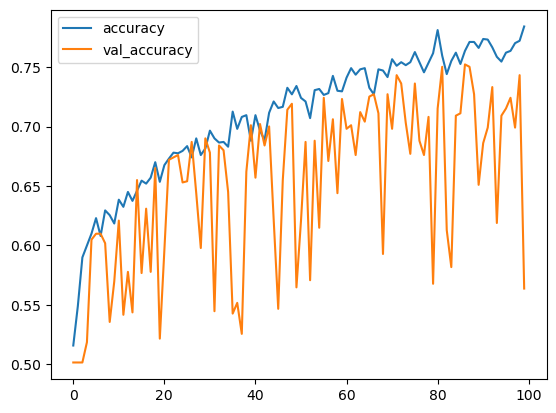

<Figure size 640x480 with 0 Axes>

In [202]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.figure()

<Figure size 640x480 with 0 Axes>

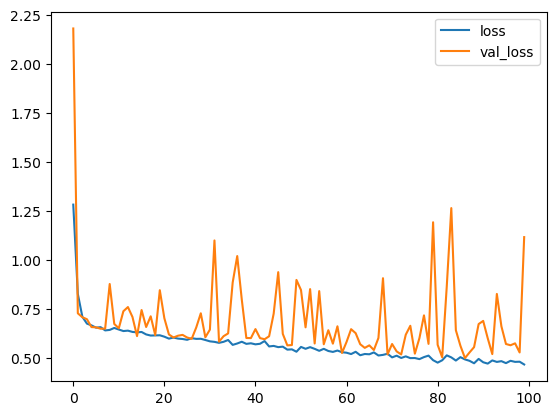

<Figure size 640x480 with 0 Axes>

In [203]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.figure()

In [204]:
acc, loss= model.evaluate(validation_generator)

50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.5446 - loss: 1.1293
